<a href="https://colab.research.google.com/github/VilarimLucas/k-means/blob/main/miniprojeto_01_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


O projeto requer que implemente uma aplicação em Python para realizar uma análise de K-means, focada na densidade populacional dos estados brasileiros.



1.   Importar bibliotecas necessárias:

In [6]:
!pip install basemap basemap-data-hires

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from mpl_toolkits.basemap import Basemap

2. Dados fictícios para densidade populacional por estado (habitantes/km²)

In [8]:
estados = ['SP', 'RJ', 'MG', 'ES', 'RS', 'SC', 'PR', 'BA', 'PE', 'CE']
latitude = [-23.55, -22.90, -19.92, -20.32, -30.03, -27.59, -25.43, -12.97, -8.05, -3.71]
longitude = [-46.63, -43.20, -43.93, -40.34, -51.23, -48.55, -49.27, -38.51, -34.88, -38.54]
densidade_populacional = [300, 400, 250, 180, 200, 150, 180, 120, 170, 160]

4. Convertendo dados para formato adequado

In [11]:

# Neste caso, latitude e longitude serão usados para posicionamento, e densidade será o critério de clustering
data = np.array(list(zip(latitude, longitude, densidade_populacional)))

# Definir o número de clusters
n_clusters = 3  # Podemos escolher 3 clusters para representar baixa, média e alta densidade populacional
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(data[:, 2].reshape(-1, 1))  # Apenas densidade

# Predizer clusters
clusters = kmeans.predict(data[:, 2].reshape(-1, 1))

5. Visualizar os resultados


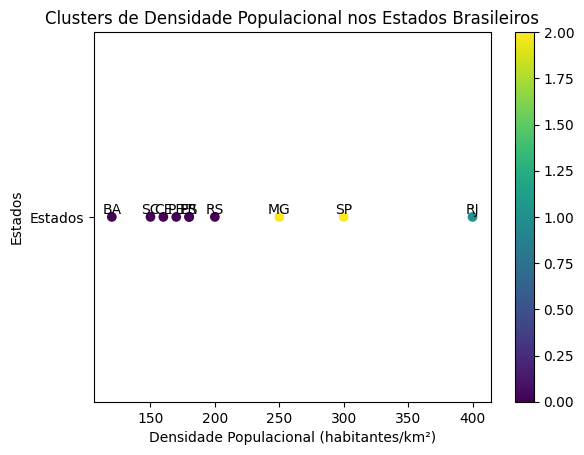

In [13]:
plt.scatter(densidade_populacional, [1]*len(densidade_populacional), c=clusters, cmap='viridis')
plt.title('Clusters de Densidade Populacional nos Estados Brasileiros')
plt.xlabel('Densidade Populacional (habitantes/km²)')
plt.ylabel('Estados')
plt.yticks([1], ['Estados'])
for i, estado in enumerate(estados):
    plt.text(densidade_populacional[i], 1, estado, ha='center', va='bottom')
plt.colorbar()
plt.show()

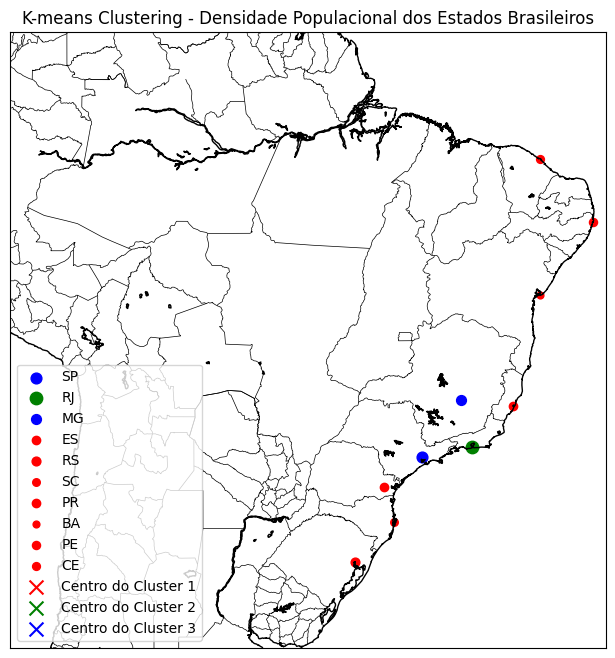

In [14]:
# Configuração do mapa
plt.figure(figsize=(10, 8))
m = Basemap(projection='merc', llcrnrlat=-35, urcrnrlat=5, llcrnrlon=-75, urcrnrlon=-34, resolution='i')
m.drawcoastlines()
m.drawcountries()
m.drawstates()

# Adicionar pontos para cada estado com cores correspondentes ao cluster
colors = ['red', 'green', 'blue']
for i, estado in enumerate(estados):
    x, y = m(longitude[i], latitude[i])
    plt.scatter(x, y, c=colors[clusters[i]], s=densidade_populacional[i]/5, label=estado)

# Plotar os centros dos clusters
for i, centro in enumerate(kmeans.cluster_centers_):
    plt.scatter([], [], c=colors[i], s=100, marker='x', label=f'Centro do Cluster {i+1}')

plt.title('K-means Clustering - Densidade Populacional dos Estados Brasileiros')
plt.legend(loc='lower left')
plt.show()
